In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [5]:
 
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=2ed4af53ac9f6cd772a161ae3d68a22b&language=en-US&page=1' , verify=False)

C:\Users\ADITYA TIWARI\OneDrive\Desktop\MyDataProject\venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [6]:

df = pd.DataFrame(response.json()['results'])[['title', 'id' , 'popularity' , 'release_date' ,'vote_average' ,'vote_count']]
df

,title,id,popularity,release_date,vote_average,vote_count
0,The Shawshank Redemption,278,35.4310,1994-09-23,8.712,28621
1,The Godfather,238,26.5722,1972-03-14,8.686,21668
2,The Godfather Part II,240,22.5491,1974-12-20,8.571,13080
3,Schindler's List,424,19.8777,1993-12-15,8.566,16588
4,12 Angry Men,389,19.8595,1957-04-10,8.549,9288
5,Spirited Away,129,21.5542,2001-07-20,8.536,17326
6,The Dark Knight,155,28.9316,2008-07-16,8.522,34156
7,Dilwale Dulhania Le Jayenge,19404,7.6793,1995-10-20,8.516,4499
8,The Green Mile,497,20.5431,1999-12-10,8.504,18244
9,Parasite,496243,25.3531,2019-05-30,8.499,19311


In [10]:
import pandas as pd
import requests
import time


s = requests.Session()
movies_list = []

print("Starting to fetch data...")
for i in range(1, 500):
    url = f'https://api.themoviedb.org/3/movie/top_rated?api_key=2ed4af53ac9f6cd772a161ae3d68a22b&language=en-US&page={i}'

    try:
        
        response = s.get(url, timeout=20 )
        response.raise_for_status()
        
       
        results = response.json().get('results', [])

        if not results:
            print(f"No more results on page {i}. This is the final page.")
            break

       
        temp_df = pd.DataFrame(results)[['title', 'id' , 'popularity' , 'release_date' ,'vote_average' ,'vote_count']]
        movies_list.append(temp_df)
        print(f"Successfully fetched page {i}")

    except requests.exceptions.RequestException as e:
        print(f"\nNetwork error on page {i}: {e}")
        print("Stopping the process due to network failure.")
        break

if movies_list:
    df = pd.concat(movies_list, ignore_index=True)
    
    print(f"\nSuccessfully created DataFrame with {len(df)} rows from {len(movies_list)} pages.")
else:
    print("\nNo data was collected.")

Starting to fetch data...
Successfully fetched page 1
Successfully fetched page 2
Successfully fetched page 3
Successfully fetched page 4
Successfully fetched page 5
Successfully fetched page 6
Successfully fetched page 7
Successfully fetched page 8
Successfully fetched page 9
Successfully fetched page 10
Successfully fetched page 11
Successfully fetched page 12
Successfully fetched page 13
Successfully fetched page 14
Successfully fetched page 15
Successfully fetched page 16
Successfully fetched page 17
Successfully fetched page 18
Successfully fetched page 19
Successfully fetched page 20
Successfully fetched page 21
Successfully fetched page 22
Successfully fetched page 23
Successfully fetched page 24
Successfully fetched page 25
Successfully fetched page 26
Successfully fetched page 27
Successfully fetched page 28
Successfully fetched page 29
Successfully fetched page 30
Successfully fetched page 31
Successfully fetched page 32
Successfully fetched page 33
Successfully fetched page 

In [11]:
df

,title,id,popularity,release_date,vote_average,vote_count
0,The Shawshank Redemption,278,35.4310,1994-09-23,8.712,28621
1,The Godfather,238,26.5722,1972-03-14,8.686,21668
2,The Godfather Part II,240,22.5491,1974-12-20,8.571,13080
3,Schindler's List,424,19.8777,1993-12-15,8.566,16588
4,12 Angry Men,389,19.8595,1957-04-10,8.549,9288
...,...,...,...,...,...,...
9975,Natale a Rio,42437,0.4625,2008-12-19,5.100,458
9976,Cruel Intentions 2,5458,1.4447,2000-11-09,5.085,402
9977,Superfast!,325358,5.4980,2015-03-05,5.080,472
9978,Kickboxer: Vengeance,308529,2.5522,2016-07-14,5.080,424


In [14]:
df.to_csv('top_rated_movies_pages_1_to_4.csv' , index = False)

#  Now Visualizing the data

In [18]:
# first of all we seperate top 10 movies from the data 
top_10_movies = df.sort_values('popularity' , ascending = False).head(10)
top_10_movies.reset_index(drop=True)


,title,id,popularity,release_date,vote_average,vote_count
0,How to Train Your Dragon,1087192,558.9468,2025-06-06,8.000,1415
1,28 Years Later,1100988,418.0824,2025-06-18,6.970,843
2,Lilo & Stitch,552524,356.3146,2025-05-17,7.333,1224
3,Happy Gilmore 2,1263256,349.6610,2025-07-25,6.730,411
4,Happy Gilmore 2,1263256,349.6610,2025-07-25,6.726,412
5,Superman,1061474,242.7327,2025-07-09,7.431,1356
6,Jurassic World Rebirth,1234821,223.2129,2025-07-01,6.331,877
7,Ballerina,541671,192.9581,2025-06-04,7.450,1232
8,Ballerina,541671,192.9581,2025-06-04,7.450,1232
9,KPop Demon Hunters,803796,187.3919,2025-06-20,8.470,886


In [20]:
# now we got top 10 movie list now we will visulize them 

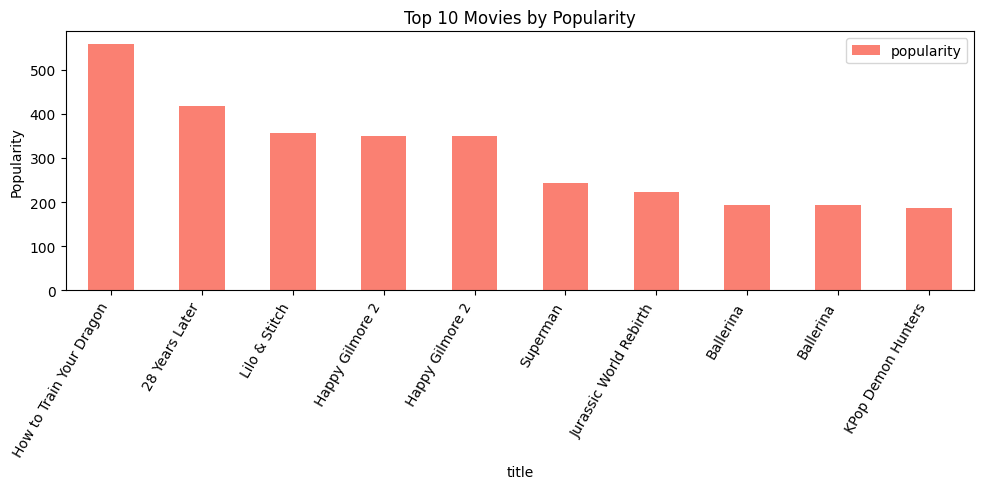

In [34]:
top_10_movies.set_index('title')[['popularity']].plot.bar(
    figsize=(10, 5),
    color='salmon',
    title='Top 10 Movies by Popularity'
)
plt.ylabel('Popularity')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


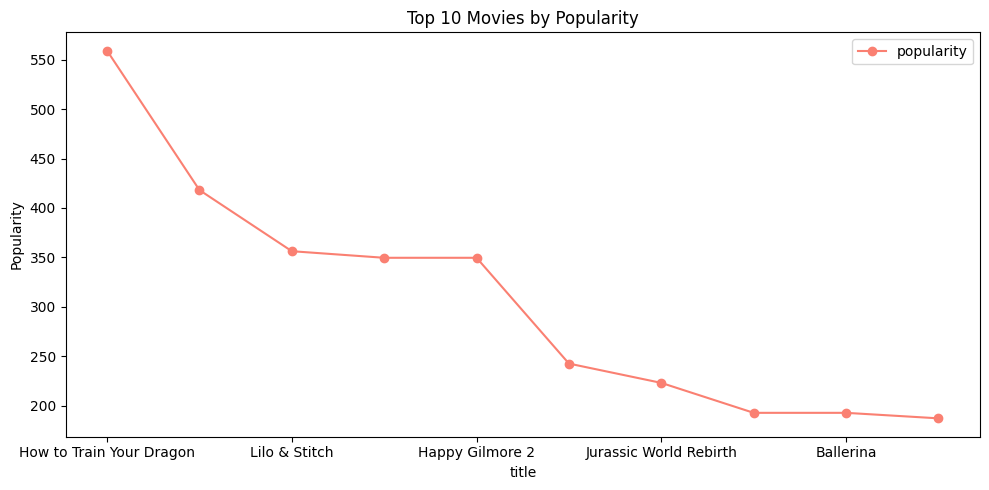

In [44]:
top_10_movies.set_index('title')[['popularity']].plot(
    kind='line',
    color='salmon',
    marker='o',              # shows dots on points
    figsize=(10, 5),
    title='Top 10 Movies by Popularity'
)

plt.ylabel('Popularity')

plt.tight_layout()
plt.show()


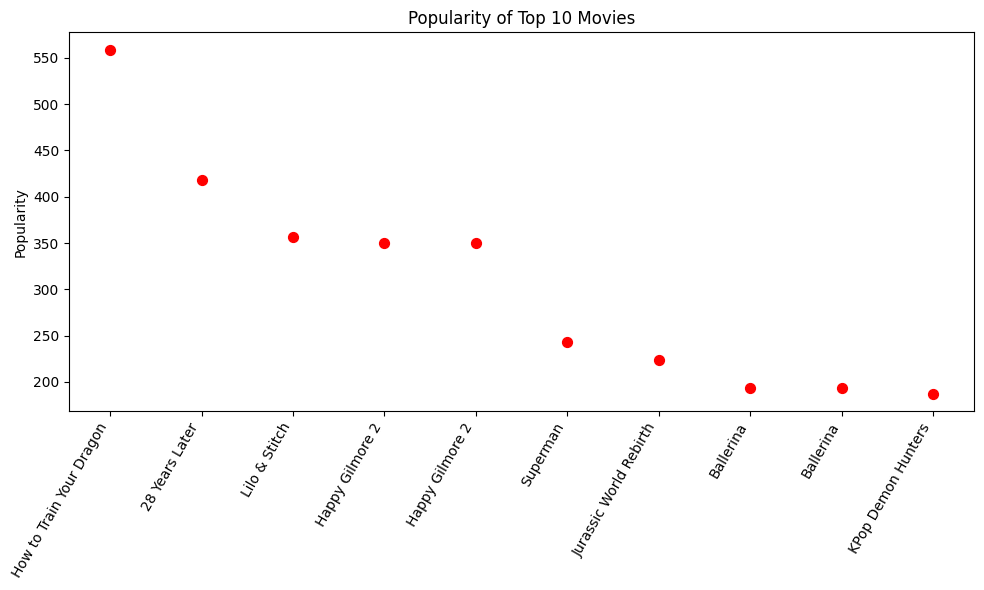

In [52]:
df2 = top_10_movies.copy()
x = range(len(df))
y = df['popularity']
plt.figure(figsize=(10,6))
plt.scatter(x ,y ,color='red' , s=50)
plt.xticks(x, df2['title'] , rotation=60 , ha = 'right')
plt.ylabel('Popularity')
plt.title('Popularity of Top 10 Movies')
plt.tight_layout()
plt.show()

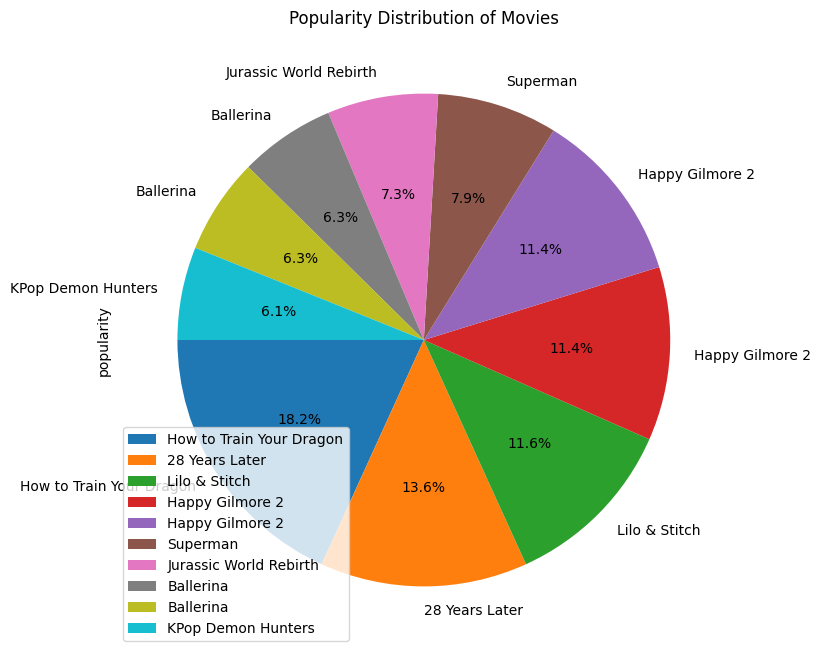

In [62]:
df2.plot.pie(
    y='popularity',
  labels=df2['title'],
    figsize=(8,8),
    autopct='%1.1f%%',     
     startangle=180      
) 
plt.title("Popularity Distribution of Movies")
plt.show()
